In [60]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('SEWA_energy.csv')
df

,Date,Day,MAX Tem,Min Tem,Max Hum,Min Hum,Temp,Hum,SEWA MIN LOAD(MW),SEWA Peak Load(MW),SEWA Energy/hr.
0,01-Jan,Friday,28 C,16 C,79%,35%,19 C,50%,652.0,812,734.0
1,02-Jan,Saturday,28 C,14 C,76%,21%,19 C,42%,643.0,936,802.0
2,03-Jan,Sunday,27 C,12 C,74%,25%,20 C,36%,682.0,949,820.0
3,04-Jan,Monday,27 C,12 C,73%,14%,17 C,16%,653.0,942,801.0
4,05-Jan,Tuesday,27 C,10 C,63%,9%,16 C,13%,647.0,925,786.0
...,...,...,...,...,...,...,...,...,...,...,...
360,27-Dec,Monday,26 C,17 C,78%,35%,24 C,32%,862.0,1079,982.0
361,28-Dec,Tuesday,26 C,15 C,83%,40%,20 C,57%,817.0,1065,963.0
362,29-Dec,Wednesday,NaN,NaN,NaN,NaN,20 C,53%,822.0,1060,120.0
363,30-Dec,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [61]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   Day                 365 non-null    object 
 2   MAX Tem             362 non-null    object 
 3   Min Tem             362 non-null    object 
 4   Max Hum             362 non-null    object 
 5   Min Hum             362 non-null    object 
 6   Temp                363 non-null    object 
 7   Hum                 363 non-null    object 
 8   SEWA MIN LOAD(MW)   363 non-null    float64
 9   SEWA Peak Load(MW)  365 non-null    int64  
 10  SEWA Energy/hr.     363 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 31.5+ KB


In [62]:
df.describe(include='object')

,Date,Day,MAX Tem,Min Tem,Max Hum,Min Hum,Temp,Hum
count,365,365,362,362,362,362,363,363
unique,365,7,28,30,57,48,24,82
top,01-Jan,Friday,43 C,30 C,86%,16%,32 C,99%
freq,1,53,26,26,18,17,33,16


In [63]:
df.describe(include='number')

,SEWA MIN LOAD(MW),SEWA Peak Load(MW),SEWA Energy/hr.
count,363.000000,365.000000,363.000000
mean,1261.705234,1658.898630,1479.559229
std,416.647411,554.056066,484.876699
min,591.000000,0.000000,120.000000
25%,858.500000,1110.000000,1001.500000
50%,1269.000000,1656.000000,1473.000000
75%,1668.500000,2224.000000,1970.000000
max,2124.000000,2487.000000,2212.000000


In [64]:
df.head()

,Date,Day,MAX Tem,Min Tem,Max Hum,Min Hum,Temp,Hum,SEWA MIN LOAD(MW),SEWA Peak Load(MW),SEWA Energy/hr.
0,01-Jan,Friday,28 C,16 C,79%,35%,19 C,50%,652.0,812,734.0
1,02-Jan,Saturday,28 C,14 C,76%,21%,19 C,42%,643.0,936,802.0
2,03-Jan,Sunday,27 C,12 C,74%,25%,20 C,36%,682.0,949,820.0
3,04-Jan,Monday,27 C,12 C,73%,14%,17 C,16%,653.0,942,801.0
4,05-Jan,Tuesday,27 C,10 C,63%,9%,16 C,13%,647.0,925,786.0


In [65]:
print(df.isnull().sum())

Date                  0
Day                   0
MAX Tem               3
Min Tem               3
Max Hum               3
Min Hum               3
Temp                  2
Hum                   2
SEWA MIN LOAD(MW)     2
SEWA Peak Load(MW)    0
SEWA Energy/hr.       2
dtype: int64


In [66]:
df.dropna(inplace=True)
print(df.isnull().sum())

Date                  0
Day                   0
MAX Tem               0
Min Tem               0
Max Hum               0
Min Hum               0
Temp                  0
Hum                   0
SEWA MIN LOAD(MW)     0
SEWA Peak Load(MW)    0
SEWA Energy/hr.       0
dtype: int64


In [67]:
duplicated_rows = len(df[df.duplicated()==True]) #checking for duplicated rows
print('Duplicated Rows present in the dataset:',duplicated_rows)
df.info()

Duplicated Rows present in the dataset: 0
<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 361
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                362 non-null    object 
 1   Day                 362 non-null    object 
 2   MAX Tem             362 non-null    object 
 3   Min Tem             362 non-null    object 
 4   Max Hum             362 non-null    object 
 5   Min Hum             362 non-null    object 
 6   Temp                362 non-null    object 
 7   Hum                 362 non-null    object 
 8   SEWA MIN LOAD(MW)   362 non-null    float64
 9   SEWA Peak Load(MW)  362 non-null    int64  
 10  SEWA Energy/hr.     362 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 33.9+ KB


In [68]:
def extract_numeric(value):
    if isinstance(value, str):
        return float(value.replace('%', '').replace(' C', ''))
    return value

for col in ['MAX Tem', 'Min Tem', 'Temp', 'Max Hum', 'Min Hum', 'Hum']:
    df[col] = df[col].apply(extract_numeric)

df['Date'] = pd.to_datetime(df['Date'] + '-2021', format='%d-%b-%Y')

In [69]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['Day'] = df['Day'].map(day_mapping)
df.head(7)

,Date,Day,MAX Tem,Min Tem,Max Hum,Min Hum,Temp,Hum,SEWA MIN LOAD(MW),SEWA Peak Load(MW),SEWA Energy/hr.
0,2021-01-01,5,28.0,16.0,79.0,35.0,19.0,50.0,652.0,812,734.0
1,2021-01-02,6,28.0,14.0,76.0,21.0,19.0,42.0,643.0,936,802.0
2,2021-01-03,7,27.0,12.0,74.0,25.0,20.0,36.0,682.0,949,820.0
3,2021-01-04,1,27.0,12.0,73.0,14.0,17.0,16.0,653.0,942,801.0
4,2021-01-05,2,27.0,10.0,63.0,9.0,16.0,13.0,647.0,925,786.0
5,2021-01-06,3,27.0,11.0,63.0,17.0,16.0,26.0,624.0,941,786.0
6,2021-01-07,4,26.0,11.0,58.0,23.0,20.0,52.0,646.0,924,785.0


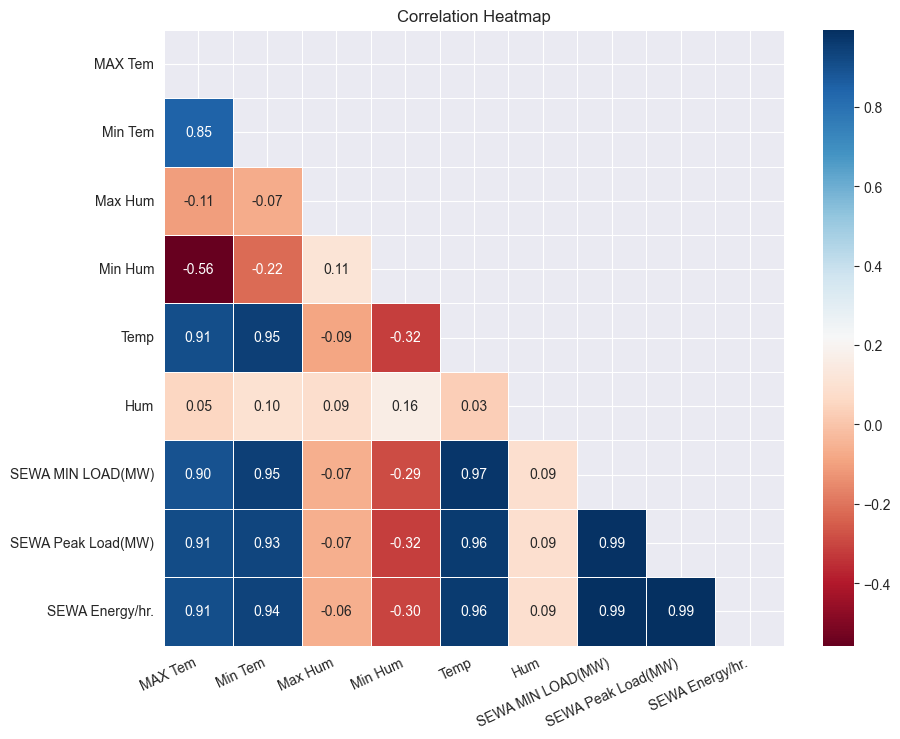

In [70]:
columns = ['MAX Tem', 'Min Tem', 'Max Hum', 'Min Hum', 'Temp', 'Hum', 
                     'SEWA MIN LOAD(MW)', 'SEWA Peak Load(MW)', 'SEWA Energy/hr.']

correlation_matrix = df[columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5, mask=mask)

plt.xticks(rotation=25, ha='right')
plt.title('Correlation Heatmap')
plt.show()

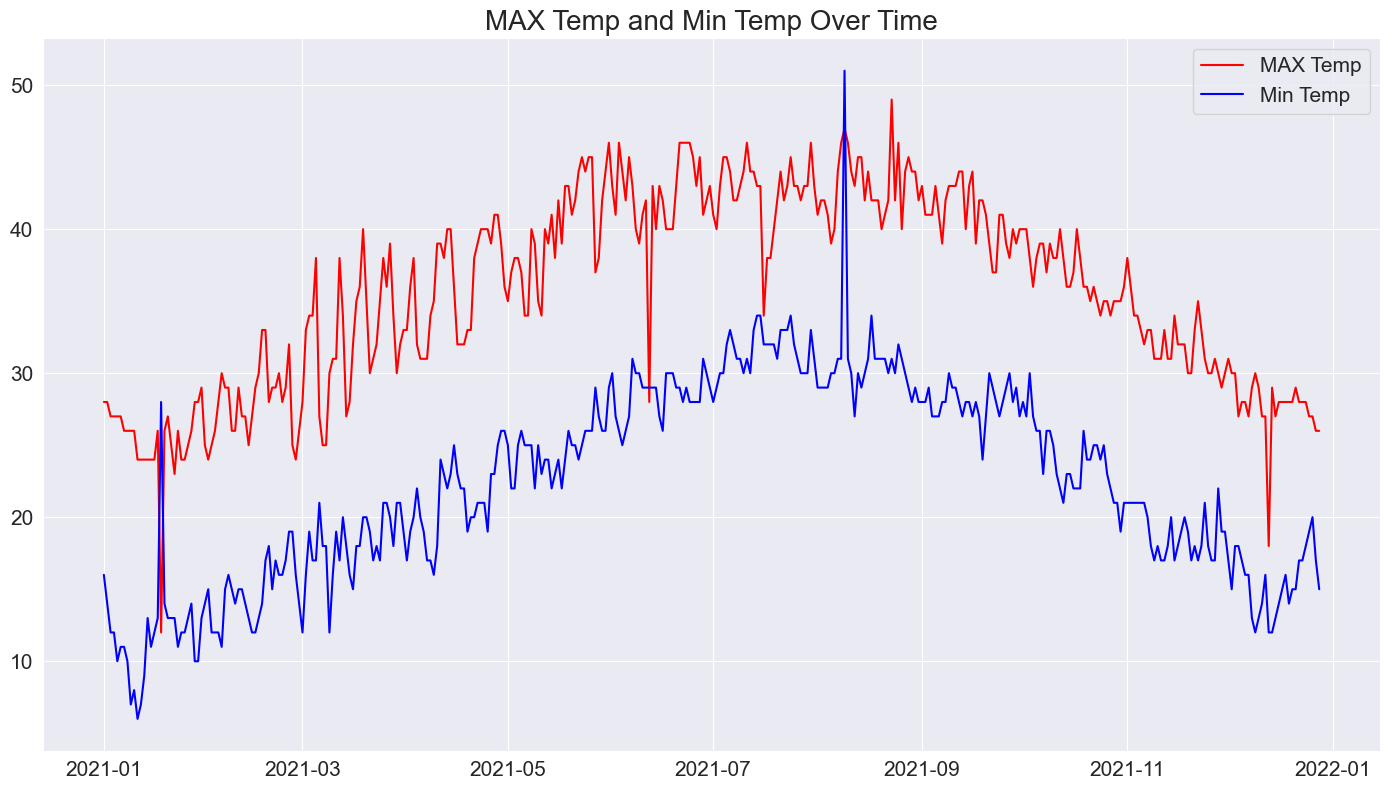

In [71]:
plot_data = df[['Date', 'MAX Tem', 'Min Tem', 'SEWA Energy/hr.']]

# Set the Date column as the index for plotting
plot_data.set_index('Date', inplace=True)

# Plot MAX Tem and Min Tem on a separate line chart
plt.figure(figsize=(14, 8))
plt.plot(plot_data.index, plot_data['MAX Tem'], label='MAX Temp', color='red')
plt.plot(plot_data.index, plot_data['Min Tem'], label='Min Temp', color='blue')

plt.xlabel('')
plt.ylabel('')
plt.title('MAX Temp and Min Temp Over Time', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

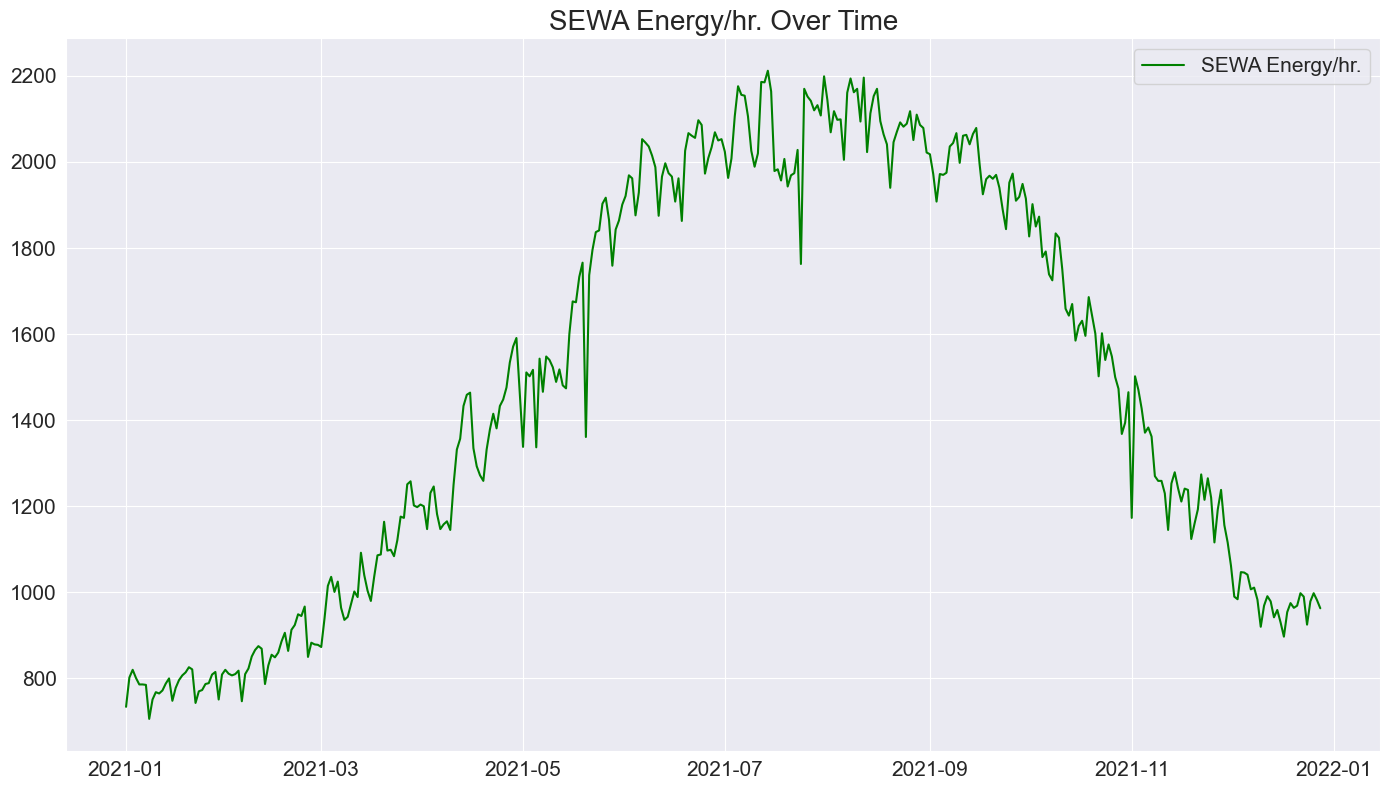

In [72]:
# Plot SEWA Energy/hr.
plt.figure(figsize=(14, 8))
plt.plot(plot_data.index, plot_data['SEWA Energy/hr.'], label='SEWA Energy/hr.', color='green')

plt.xlabel('')
plt.ylabel('')
plt.title('SEWA Energy/hr. Over Time', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

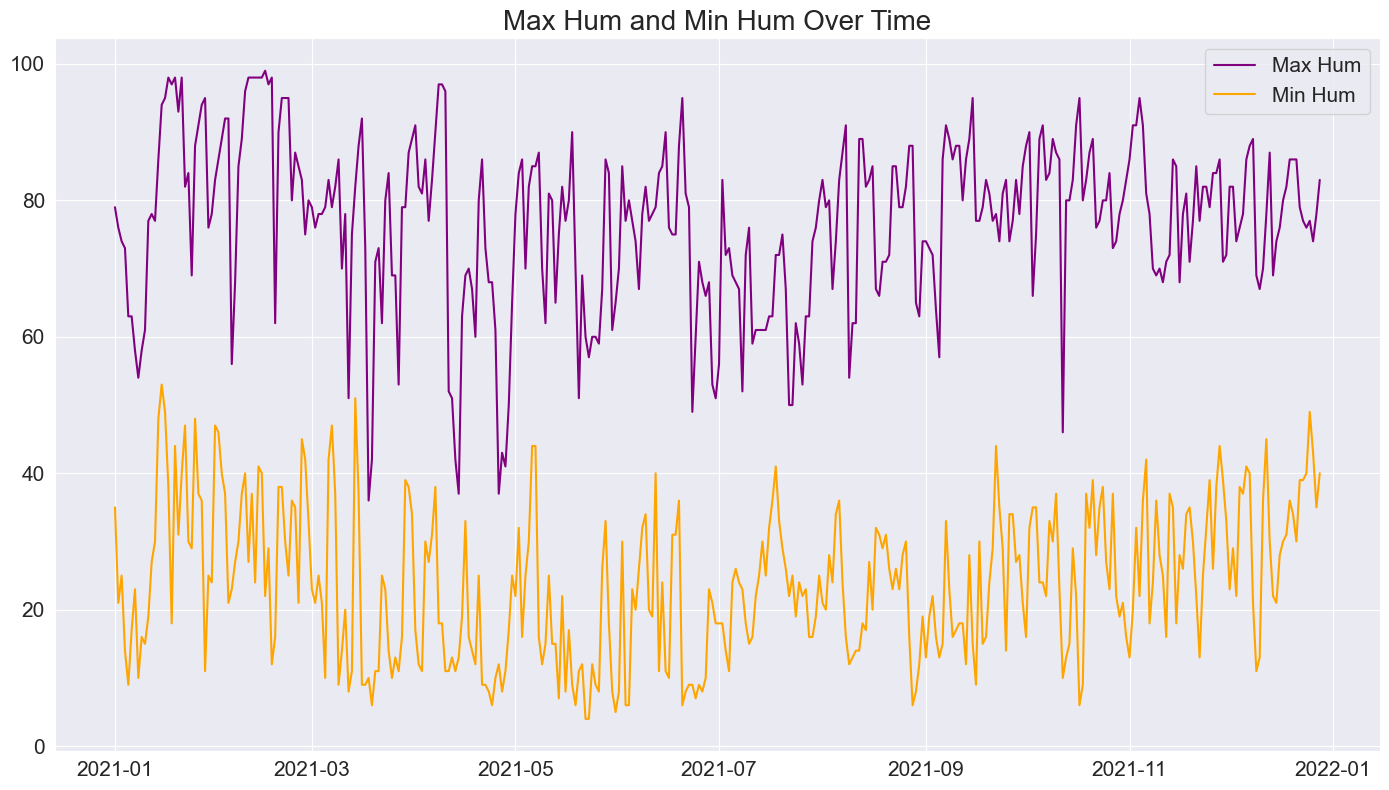

In [75]:
humidity_data = df[['Date', 'Max Hum', 'Min Hum']]

humidity_data.set_index('Date', inplace=True)

# Plot Max Hum and Min Hum on a line chart
plt.figure(figsize=(14, 8))
plt.plot(humidity_data.index, humidity_data['Max Hum'], label='Max Hum', color='purple')
plt.plot(humidity_data.index, humidity_data['Min Hum'], label='Min Hum', color='orange')

plt.xlabel('')
plt.ylabel('')
plt.title('Max Hum and Min Hum Over Time', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

In [73]:
df['Max Hum'].replace(881, 81, inplace=True)

df[df['Date'] == '2021-05-11']

,Date,Day,MAX Tem,Min Tem,Max Hum,Min Hum,Temp,Hum,SEWA MIN LOAD(MW),SEWA Peak Load(MW),SEWA Energy/hr.
130,2021-05-11,2,34.0,23.0,81.0,25.0,27.0,60.0,1266.0,1661,1489.0


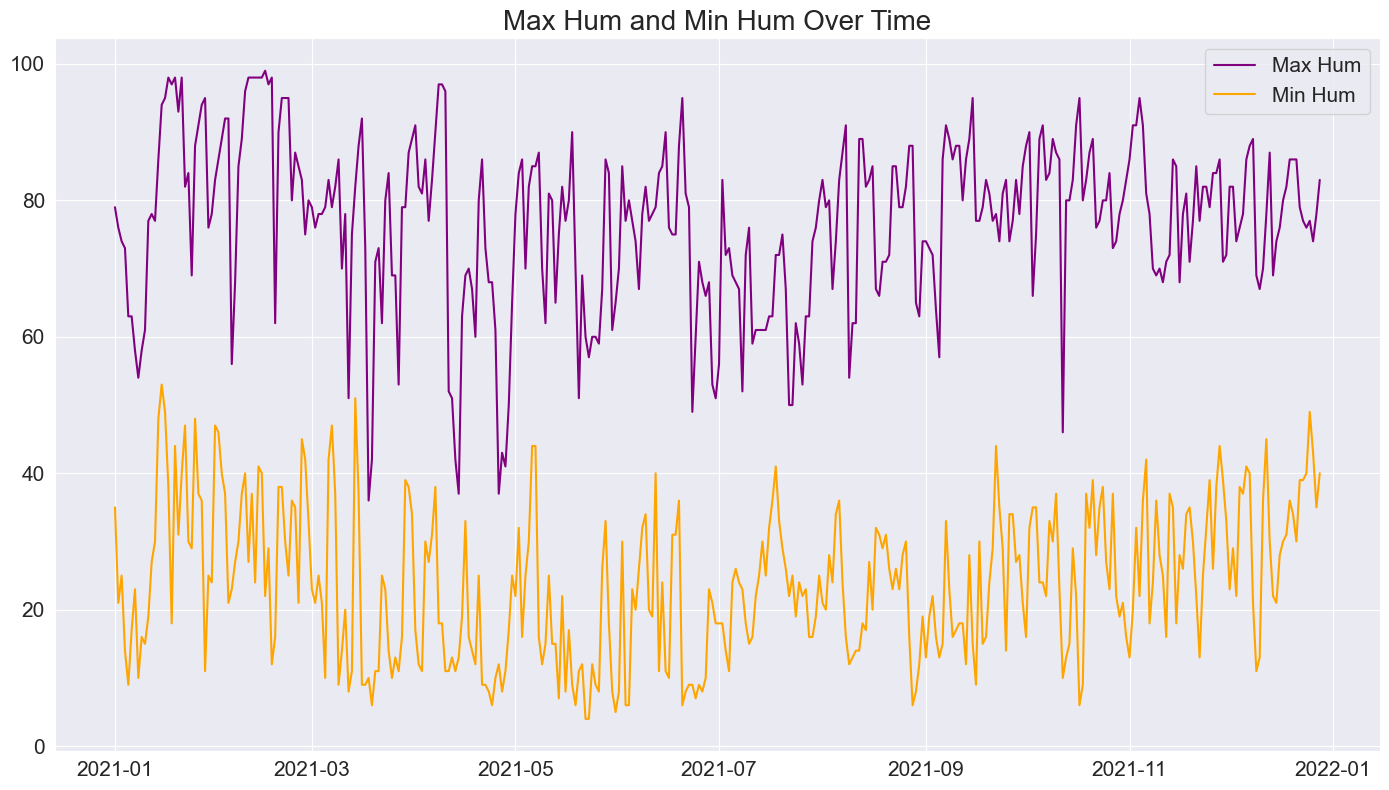

In [74]:
humidity_data = df[['Date', 'Max Hum', 'Min Hum']]

humidity_data.set_index('Date', inplace=True)

# Plot Max Hum and Min Hum on a line chart
plt.figure(figsize=(14, 8))
plt.plot(humidity_data.index, humidity_data['Max Hum'], label='Max Hum', color='purple')
plt.plot(humidity_data.index, humidity_data['Min Hum'], label='Min Hum', color='orange')

plt.xlabel('')
plt.ylabel('')
plt.title('Max Hum and Min Hum Over Time', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

In [76]:
#extracting month from the date column
df['Month'] = pd.to_datetime(df['Date'], format='%d-%b').dt.month

#categorizing months into 4 seasons
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

df['Season'] = df['Month'].map(season_map)
# dropping date and month column, as season column has been extracted from them
df.drop(['Date','Month'],axis=1,inplace=True) 

In [77]:
encoder = OneHotEncoder(sparse_output=False)

# Encode 'Day' and 'Season' columns
encoded_data = encoder.fit_transform(df[['Day', 'Season']])

# Create DataFrame with encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Day', 'Season']))

# Concatenate original DataFrame with encoded DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded.drop(['Day','Season'],axis=1,inplace=True)
df_encoded

,MAX Tem,Min Tem,Max Hum,Min Hum,Temp,Hum,SEWA MIN LOAD(MW),SEWA Peak Load(MW),SEWA Energy/hr.,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Season_Autumn,Season_Monsoon,Season_Summer,Season_Winter
0,28.0,16.0,79.0,35.0,19.0,50.0,652.0,812,734.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,28.0,14.0,76.0,21.0,19.0,42.0,643.0,936,802.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,27.0,12.0,74.0,25.0,20.0,36.0,682.0,949,820.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,27.0,12.0,73.0,14.0,17.0,16.0,653.0,942,801.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,27.0,10.0,63.0,9.0,16.0,13.0,647.0,925,786.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,28.0,18.0,76.0,40.0,21.0,47.0,797.0,995,925.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
358,27.0,19.0,77.0,49.0,21.0,53.0,813.0,1098,979.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
359,27.0,20.0,74.0,43.0,24.0,40.0,877.0,1098,998.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
360,26.0,17.0,78.0,35.0,24.0,32.0,862.0,1079,982.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
#not giving energy min, max and avg demand to forecast target
X = df_encoded.drop(['SEWA MIN LOAD(MW)', 'SEWA Peak Load(MW)','SEWA Energy/hr.'],axis=1)
y = df_encoded['SEWA Peak Load(MW)']


# when giving only the avg temp and avg hum to forecast target
# X = df_encoded.drop(['Avg_Energy/hr','Min_Load', 'Max_Load'],axis=1)
# y = df_encoded['Avg_Energy/hr']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

# MODEL 

### RANDOM FOREST

In [103]:
rf_model = RandomForestRegressor(n_estimators=90,max_depth=100,min_samples_split=20,min_samples_leaf=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

In [101]:
def print_model_performance(model_name, best_mse, best_r2,best_rmse, best_mae):
    print(f"### {model_name} ###")
    print(f" Model MSE: {best_mse:.4f}, R²: {best_r2:.4f}, RMSE: {best_rmse:.4f}, MAE: {best_mae:.4f}")

In [104]:
print("Model Performace")
print_model_performance("Random Forest Regression", mse_rf, r2_rf, rf_rmse, rf_mae)

Model Performace
### Random Forest Regression ###
 Model MSE: 9110.0152, R²: 0.9696, RMSE: 95.4464, MAE: 72.9166


### LINEAR

In [24]:
from sklearn.linear_model import LinearRegression, BayesianRidge

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)
LR_model.coef_, LR_model.intercept_

(array([ 21.02749697,  12.59139087,   0.2003667 ,   1.36792331,
         35.29804342,   0.25196373,  11.9580762 ,  29.50485534,
          9.42253703,   2.14345003, -49.27406724, -15.8575361 ,
         12.10268475,  63.71381952,  97.50046699, -95.87262309,
        -65.34166343]),
 -575.9204432314173)

In [88]:
y_pred_lr = LR_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr =  mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr,squared=False)

print("r2:", r2_score(y_test, y_pred_lr))
print("mae:", mean_absolute_error(y_test, y_pred_lr))
print("mse:",mean_squared_error(y_test, y_pred_lr))
print("rmse:",mean_squared_error(y_test, y_pred_lr,squared=False))

r2: 0.8467667011568384
mae: 187.40257158110185
mse: 45982.533735081546
rmse: 214.43538358927975


## MLP

In [90]:
MLP_model = MLPRegressor()
MLP_model.fit(X_train, y_train)

y_pred_mlp = MLP_model.predict(X_test)

r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp =  mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp,squared=False)

print("r2:", r2_score(y_test, y_pred_mlp))
print("mae:", mean_absolute_error(y_test, y_pred_mlp))
print("mse:",mean_squared_error(y_test, y_pred_mlp))
print("rmse:",mean_squared_error(y_test, y_pred_mlp,squared=False))

r2: 0.15271281238093182
mae: 436.0840475491514
mse: 254255.51745037606
rmse: 504.2375605311212


### SVM

In [43]:
from sklearn.svm import SVR


svm = SVR(C=200.0, kernel='rbf', gamma=0.05, verbose=True)
svm.fit(X_train, y_train)

[LibSVM]

SVR(C=200.0, gamma=0.05, verbose=True)

In [91]:
y_pred_svm = svm.predict(X_test)


r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)

print("r2:", r2_score(y_test, y_pred_svm))
print("mae:", mean_absolute_error(y_test, y_pred_svm))
print("mse:", mean_squared_error(y_test, y_pred_svm))
print("rmse:", mean_squared_error(y_test, y_pred_svm, squared=False))

r2: 0.14531911682492515
mae: 445.39583099143795
mse: 256474.2313846038
rmse: 506.4328498276981


## RANDOM FOREST
### GRID SEARCH, RANDOMIZED SEARCH

In [38]:
from sklearn.ensemble import RandomForestRegressor

model_rfc = RandomForestRegressor(max_depth=15)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'max_depth': [5, 10, 15, 20, 30],
              'random_state': [0, 1, 2, 3, 4],
              'n_estimators': [10, 30, 50, 70, 100, 150]
              }

grid_GS = GridSearchCV(model_rfc, parameters, cv=2, verbose=2)
grid_RS = RandomizedSearchCV(model_rfc, parameters, cv=2)
grid_GS.fit(X_train, y_train)

grid_RS.fit(X_train, y_train)

Fitting 2 folds for each of 150 candidates, totalling 300 fits
[CV] END .......max_depth=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=0; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=1; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=1; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=2; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=2; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=3; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=3; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=4; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=10, random_state=4; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=30, random_state=0; total time=   0.0s
[CV] END .......max_depth=5, n_estimators=30, 

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(max_depth=15),
                   param_distributions={'max_depth': [5, 10, 15, 20, 30],
                                        'n_estimators': [10, 30, 50, 70, 100,
                                                         150],
                                        'random_state': [0, 1, 2, 3, 4]})

In [39]:
print('Grid search results')
print(grid_GS.best_params_)
print(grid_GS.best_estimator_)
print(grid_GS.best_score_)
y_pred_rfc = grid_GS.predict(X_test)


Grid search results
{'max_depth': 5, 'n_estimators': 10, 'random_state': 2}
RandomForestRegressor(max_depth=5, n_estimators=10, random_state=2)
0.9594468539278014


In [107]:
r2_rfc = r2_score(y_test, y_pred_rfc)
mae_rfc = mean_absolute_error(y_test, y_pred_rfc)
mse_rfc = mean_squared_error(y_test, y_pred_rfc)
rmse_rfc = mean_squared_error(y_test, y_pred_rfc, squared=False)


print("r2:", r2_score(y_test, y_pred_rfc))
print("mae:", mean_absolute_error(y_test, y_pred_rfc))
print("mse:", mean_squared_error(y_test, y_pred_rfc))
print("rmse:", mean_squared_error(y_test, y_pred_rfc, squared=False))

r2: 0.8522534719121817
mae: 184.88796432124337
mse: 44336.05334694824
rmse: 210.56128169003017


In [92]:
y_pred_RS = grid_RS.predict(X_test)

r2_rs = r2_score(y_test, y_pred_RS)
mae_rs = mean_absolute_error(y_test, y_pred_RS)
mse_rs = mean_squared_error(y_test, y_pred_RS)
rmse_rs = mean_squared_error(y_test, y_pred_RS, squared=False)


print("r2:", r2_score(y_test, y_pred_RS))
print("mae:", mean_absolute_error(y_test, y_pred_RS))
print("mse:", mean_squared_error(y_test, y_pred_RS))
print("rmse:", mean_squared_error(y_test, y_pred_RS, squared=False))

r2: 0.8513762621637181
mae: 185.7739726027397
mse: 44599.28808219178
rmse: 211.18543529844047


## NAIVE BAYES
### Bayesian Ridge

In [109]:
from sklearn.linear_model import BayesianRidge

NB_model = BayesianRidge()
NB_model.fit(X_train, y_train)
NB_predict = NB_model.predict(X_test)

r2_nb = r2_score(y_test, NB_predict)
mae_nb = mean_absolute_error(y_test, NB_predict)
mse_nb = mean_squared_error(y_test, NB_predict)
rmse_nb = mean_squared_error(y_test, NB_predict, squared=False)

print("r2:", r2_score(y_test, NB_predict))
print("mae:", mean_absolute_error(y_test, NB_predict))
print("mse:", mean_squared_error(y_test, NB_predict))
print("rmse:", mean_squared_error(y_test, NB_predict, squared=False))

r2: 0.9679152547923711
mae: 67.27776256067604
mse: 9628.050104183574
rmse: 98.12262789073463


## DECISION TREE

In [110]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=3)

tree_model.fit(X_train, y_train)
test_predictions = tree_model.predict(X_test)

r2_tree = r2_score(y_test, test_predictions)
mae_tree = mean_absolute_error(y_test, test_predictions)
mse_tree = mean_squared_error(y_test, test_predictions)
rmse_tree = mean_squared_error(y_test, test_predictions, squared=False)

print("r2:", r2_score(y_test, test_predictions))
print("mae:", mean_absolute_error(y_test, test_predictions))
print("mse:", mean_squared_error(y_test, test_predictions))
print("rmse:", mean_squared_error(y_test, test_predictions, squared=False))

r2: 0.9394046479985428
mae: 96.53464947557413
mse: 18183.56609582637
rmse: 134.84645377549373


## KNN

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import VALID_METRICS

KNN_model = KNeighborsRegressor(n_neighbors=7, metric='euclidean')
KNN_model.fit(X_train, y_train)
KNN_predict = KNN_model.predict(X_test)

r2_knn = r2_score(y_test, KNN_predict)
mae_knn = mean_absolute_error(y_test, KNN_predict)
mse_knn = mean_squared_error(y_test, KNN_predict)
rmse_knn = mean_squared_error(y_test, KNN_predict, squared=False)

print("r2:", r2_score(y_test, KNN_predict))
print("mae:", mean_absolute_error(y_test, KNN_predict))
print("mse:", mean_squared_error(y_test, KNN_predict))
print("rmse:", mean_squared_error(y_test, KNN_predict, squared=False))

r2: 0.9062984604732264
mae: 133.28375733855185
mse: 28118.132513279288
rmse: 167.684622172933


## adaboost

In [128]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor


Ada_model = AdaBoostRegressor(n_estimators=50, random_state=42)
Ada_model.fit(X_train, y_train)
ada_predict = Ada_model.predict(X_test)

r2_ada = r2_score(y_test, ada_predict)
mae_ada = mean_absolute_error(y_test, ada_predict)
mse_ada = mean_squared_error(y_test, ada_predict)
rmse_ada = mean_squared_error(y_test, ada_predict, squared=False)

print("r2:", r2_score(y_test, ada_predict))
print("mae:", mean_absolute_error(y_test, ada_predict))
print("mse:", mean_squared_error(y_test, ada_predict))
print("rmse:", mean_squared_error(y_test, ada_predict, squared=False))

r2: 0.9718463750013224
mae: 74.88796909344154
mse: 8448.392229626006
rmse: 91.91513602027692


## XGB

In [112]:
from xgboost import XGBRegressor
import xgboost as xgb

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train, verbose = False)
y_pred_xgb = model_xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

print("r2:", r2_score(y_test, y_pred_xgb))
print("mae:", mean_absolute_error(y_test, y_pred_xgb))
print("mse:", mean_squared_error(y_test, y_pred_xgb))
print("rmse:", mean_squared_error(y_test, y_pred_xgb, squared=False))

r2: 0.9704179167747498
mae: 69.8999132130244
mse: 8877.047606587563
rmse: 94.21808534770574


## ANN

In [83]:
import tensorflow as tf
from keras import Sequential
from tf_keras.layers import Dense
import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# from keras.optimizers import SGD
ANN_model = Sequential()
ANN_model.add(Dense(8, activation='relu', input_dim=26))
ANN_model.add(Dense(5, activation='softmax'))

ANN_model.compile(optimizer='adam', loss='sequential_crossentropy', metrics=['mse'])

ANN_model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tf_keras.src.layers.core.dense.Dense object at 0x00000203039FC3D0> (of type <class 'tf_keras.src.layers.core.dense.Dense'>)

In [ ]:
y_categorical = np_utils.to_categorical(y_train)
y_test_c = np_utils.to_categorical(y_test)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = ANN_model.fit(X_train, y_categorical, validation_data=(X_test, y_test_c), epochs=100, batch_size=3,
                        callbacks=callback)

In [ ]:
ANN_accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(ANN_accuracy)+1)

plt.plot(epochs, ANN_accuracy, '-', label='Training accuracy')
plt.plot(epochs, val_acc, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
ANN_loss, ANN_acc = ANN_model.evaluate(X_test, y_test_c, verbose=0)
print('accuracy ', ANN_acc)
print("mae:", mean_absolute_error(y_test, y_pred_svm))
print("mse:", mean_squared_error(y_test, y_pred_svm))
print("rmse:", mean_squared_error(y_test, y_pred_svm, squared=False))


## LSTM

In [98]:
import tensorflow as tf
from tf_keras import models
from tf_keras.models import Sequential
from tf_keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [126]:
x = int(np.ceil(len(df_encoded) * 0.95))
x

344

In [127]:

trained_data = df_encoded[0:int(x), :]
x_train = []
y_train = []
for i in range(60, x):
    x_train.append(trained_data[i - 60:i, 0])
    y_train.append(trained_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

InvalidIndexError: (slice(0, 344, None), slice(None, None, None))

In [99]:
model.fit(X_train,y_train)


10/10 [==============================] - 7s 17ms/step - loss: 3129930.7500


In [ ]:
test_data = df_encoded[x-60:,:]
x_test = []
lstm_pred = []

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

    
y_test=df_encoded[x:,:]

x_test = np.array(x_test)

for x in range(0,len(test_data)):
    x = x +1
    predictions = model.predict(x_test)
    
    lstm_pred.append(predictions)
    x_test = np.array(x_test)
    #predictions = []

In [100]:
#lstm_pred = model.predict(X_test)

r2_lstm = r2_score(y_test, lstm_pred)
mae_lstm = mean_absolute_error(y_test, lstm_pred)
mse_lstm = mean_squared_error(y_test, lstm_pred)
rmse_lstm = mean_squared_error(y_test, lstm_pred, squared=False)

print("r2:", r2_score(y_test, lstm_pred))
print("mae:", mean_absolute_error(y_test, lstm_pred))
print("mse:", mean_squared_error(y_test, lstm_pred))
print("rmse:", mean_squared_error(y_test, lstm_pred, squared=False))

3/3 [==============================] - 1s 9ms/step
r2: -8.374059677124023
mae: 1585.2130328792416
mse: 2812985.1171349026
rmse: 1677.195610873968


### COMPARISION

AttributeError: module 'seaborn' has no attribute 'box'

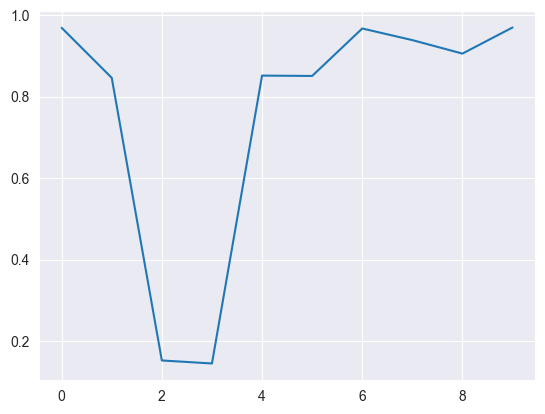

In [115]:
plt.plot([r2_rf,r2_lr,r2_mlp,r2_svm,r2_rfc,r2_rs,r2_nb,r2_tree,r2_knn,r2_xgb],
         label='r2')
sns.box
plt.title('r2 comparision')

In [132]:
plot_data_r2 = np.array([r2_rf,r2_lr,r2_mlp,r2_svm,r2_rfc,r2_rs,r2_nb,r2_tree,r2_knn,r2_xgb,r2_ada])

<Axes: title={'center': 'r2 comparision of different models'}, xlabel='Models', ylabel='r2'>

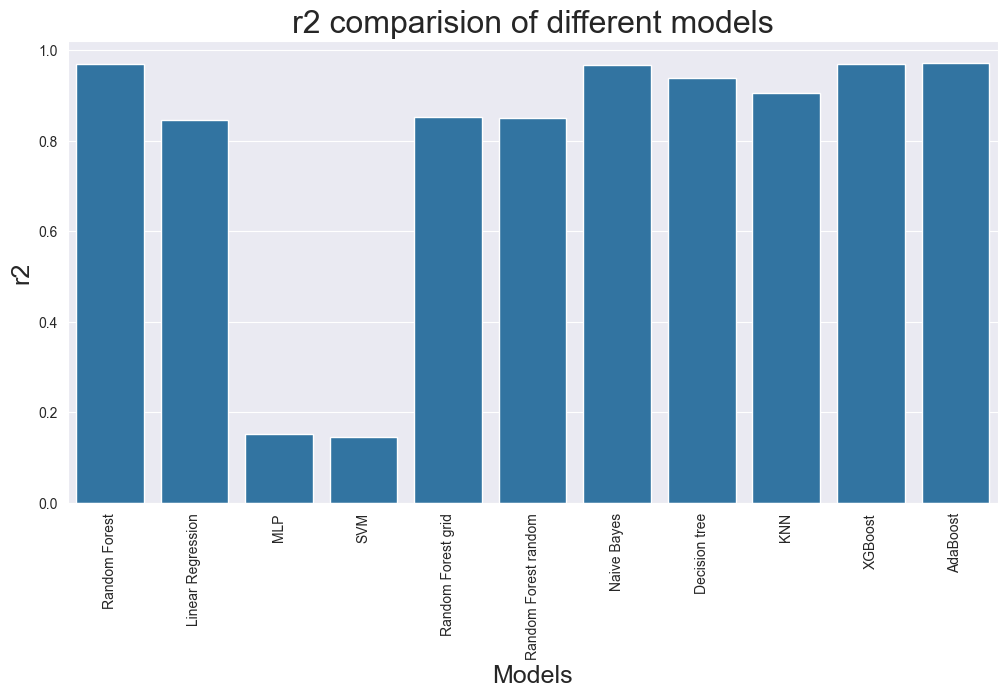

In [133]:
plot_data = pd.Series(plot_data_r2, index=['Random Forest','Linear Regression', "MLP",'SVM', 'Random Forest grid','Random Forest random', 'Naive Bayes', 'Decision tree', 'KNN', 'XGBoost','AdaBoost'])
plt.figure(figsize=(12,6))
plt.title('r2 comparision of different models', fontsize=23)
plt.ylabel('r2', fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.xticks(rotation = 90)
sns.barplot(x=plot_data.index, y= plot_data.values)

<Axes: title={'center': 'mse comparision of different models'}, xlabel='Models', ylabel='mse'>

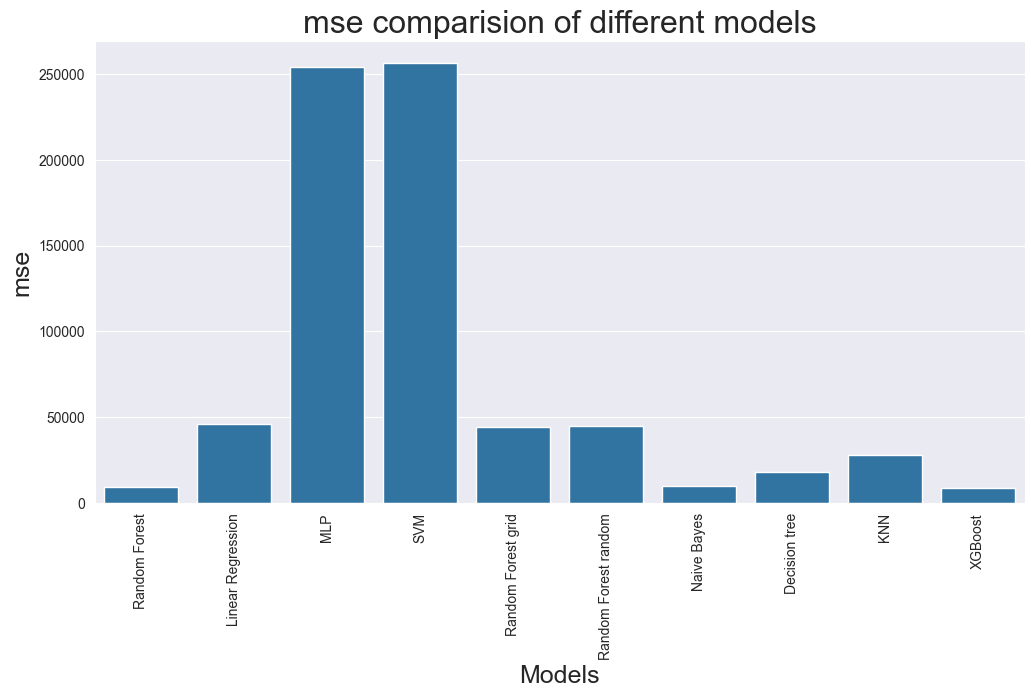

In [119]:
plot_data_mse = np.array([mse_rf, mse_lr, mse_mlp, mse_svm, mse_rfc, mse_rs, mse_nb, mse_tree, mse_knn, mse_xgb])
plot_data = pd.Series(plot_data_mse, index=['Random Forest', 'Linear Regression', "MLP", 'SVM', 'Random Forest grid',
                                           'Random Forest random', 'Naive Bayes', 'Decision tree', 'KNN', 'XGBoost'])
plt.figure(figsize=(12, 6))
plt.title('mse comparision of different models', fontsize=23)
plt.ylabel('mse', fontsize=18)
plt.xlabel('Models', fontsize=18)
plt.xticks(rotation=90)
sns.barplot(x=plot_data.index, y=plot_data.values)

<Axes: title={'center': 'mse comparision of different models'}, xlabel='Models', ylabel='mse'>

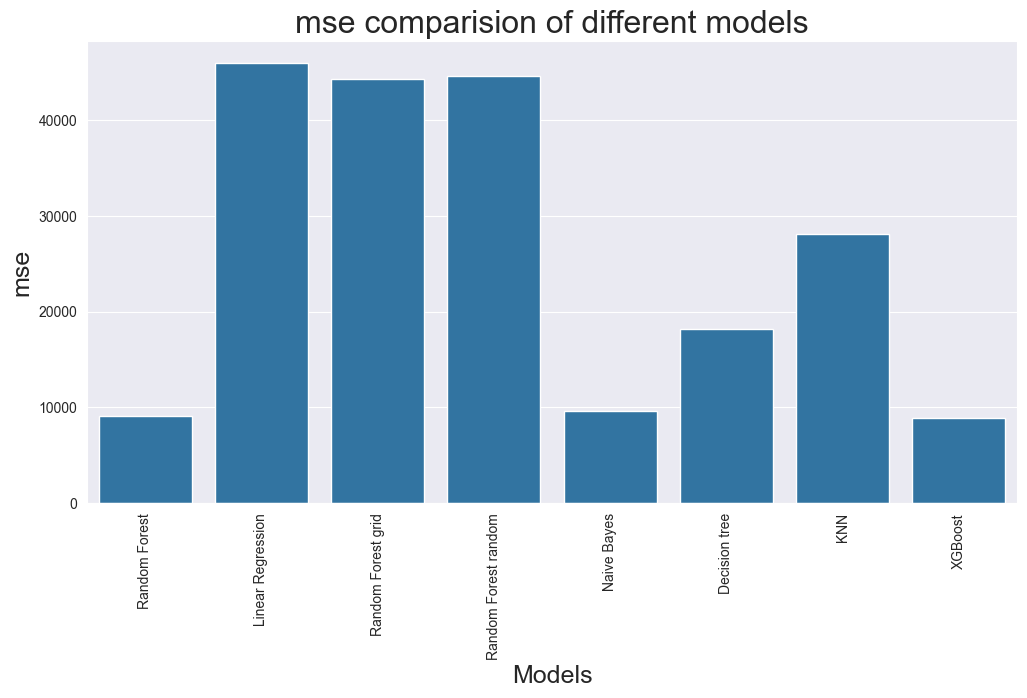

In [122]:
plot_data_mse = np.array([mse_rf, mse_lr, mse_rfc, mse_rs, mse_nb, mse_tree, mse_knn, mse_xgb])
plot_data = pd.Series(plot_data_mse, index=['Random Forest', 'Linear Regression', 'Random Forest grid',
                                           'Random Forest random', 'Naive Bayes', 'Decision tree', 'KNN', 'XGBoost'])
plt.figure(figsize=(12, 6))
plt.title('mse comparision of different models', fontsize=23)
plt.ylabel('mse', fontsize=18)
plt.xlabel('Models', fontsize=18)
plt.xticks(rotation=90)
sns.barplot(x=plot_data.index, y=plot_data.values)

# rsme

<Axes: title={'center': 'rmse comparision of different models'}, xlabel='Models', ylabel='rmse'>

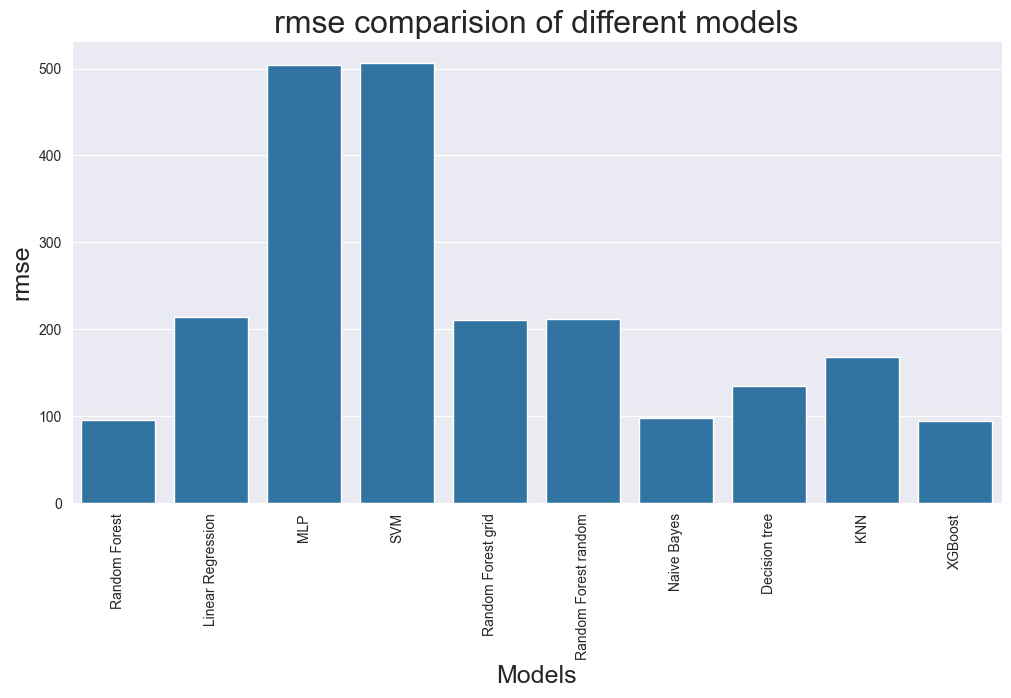

In [121]:
plot_data_rmse = np.array([rf_rmse, rmse_lr, rmse_mlp, rmse_svm, rmse_rfc, rmse_rs, rmse_nb, rmse_tree, rmse_knn, rmse_xgb])
plot_data = pd.Series(plot_data_rmse, index=['Random Forest', 'Linear Regression', "MLP", 'SVM', 'Random Forest grid',
                                           'Random Forest random', 'Naive Bayes', 'Decision tree', 'KNN', 'XGBoost'])
plt.figure(figsize=(12, 6))
plt.title('rmse comparision of different models', fontsize=23)
plt.ylabel('rmse', fontsize=18)
plt.xlabel('Models', fontsize=18)
plt.xticks(rotation=90)
sns.barplot(x=plot_data.index, y=plot_data.values)

<Axes: title={'center': 'rmse comparision of different models'}, xlabel='Models', ylabel='rmse'>

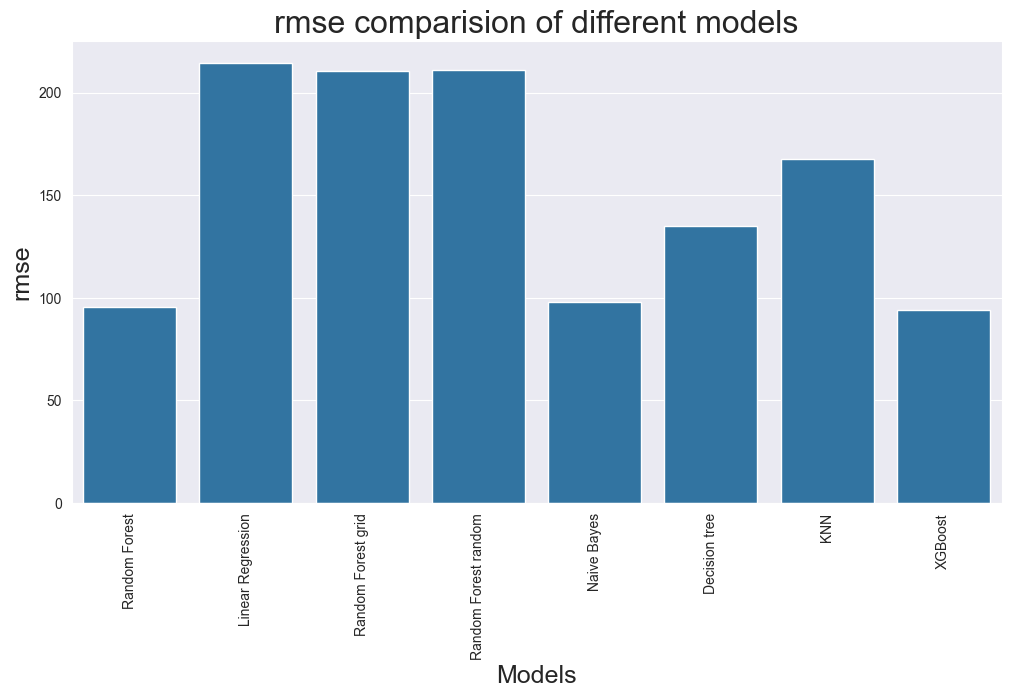

In [123]:
plot_data_rmse = np.array([rf_rmse, rmse_lr,  rmse_rfc, rmse_rs, rmse_nb, rmse_tree, rmse_knn, rmse_xgb])
plot_data = pd.Series(plot_data_rmse, index=['Random Forest', 'Linear Regression',  'Random Forest grid',
                                           'Random Forest random', 'Naive Bayes', 'Decision tree', 'KNN', 'XGBoost'])
plt.figure(figsize=(12, 6))
plt.title('rmse comparision of different models', fontsize=23)
plt.ylabel('rmse', fontsize=18)
plt.xlabel('Models', fontsize=18)
plt.xticks(rotation=90)
sns.barplot(x=plot_data.index, y=plot_data.values)

In [105]:
r2_rf,r2_lr,r2_mlp,r2_svm,r2_rfc,r2_rs,r2_nb,r2_tree,r2_knn,r2_xgb,r2_lstm
mse_rf,mae_lr,mae_mlp
rf_rmse,mse_lr,mse_mlp
rf_mae,rmse_lr,rmse_mlp

NameError: name 'r2_rfc' is not defined